# Solving polynomial equations

In this recipe, you will learn how to solve polynomial equations using OpenCV. Such problems can arise in such areas as machine learning, computational algebra, and signal processing.

Polynomial equations of degree $n$ always have n roots in the complex domain (some of them can be repeated, however). All of the solutions can be found using the `cv2.solvePoly` function. It takes equation coefficients and returns all of the roots.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid_old(plt, axis ='off',
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ax = plt.gca()
    x_major_ticks=np.arange(x_min, x_max, x_major_size)
    x_minor_ticks=np.arange(x_min, x_max, x_minor_size)
    y_major_ticks=np.arange(y_min, y_max, y_major_size)
    y_minor_ticks=np.arange(y_min, y_max, y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:
        x_min=-10; x_max=10; y_min=-10; y_max=10;
    else:
        x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:
        x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else:
        x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ax = plt.gca()
    x_major_ticks=np.arange(x_min, x_max, x_major_size)
    x_minor_ticks=np.arange(x_min, x_max, x_minor_size)
    y_major_ticks=np.arange(y_min, y_max, y_major_size)
    y_minor_ticks=np.arange(y_min, y_max, y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S06\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s06\env

d:\html_doc\program\opencv\packt\s06\env\lib\site-packages
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S06\env


------  coeffs-------------------    Shape(5, 1) coeffs: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]


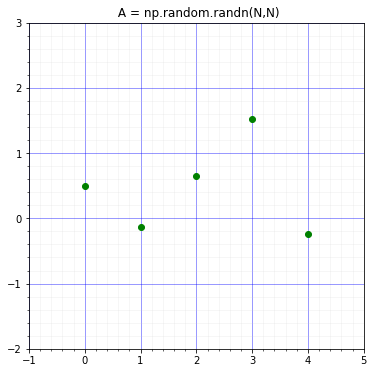

In [2]:
np.random.seed(42)
N = 4
coeffs = np.random.randn(N+1,1)


#######################################
print_image('coeffs','coeffs',coeffs,0,5,0,4)

plt.figure(figsize=(6,6))
plt_view_grid(plt, 'on',(-1,5,-2,3),(1,0.2,1,0.2),major_color='b')
plt.title(' A = np.random.randn(N,N)')
plt.plot(coeffs,'o', color="green")
plt.show()

Polynomial equations of degree $n$ always have $n$ roots in the complex domain (some of them can be repeated, however). All of the solutions can be found using the `cv2.solvePoly` function. It takes equation coefficients and returns all of the roots.

------  roots--------------------    Shape(4, 1, 2) roots: float64
[[-8.59204140e-01 -1.62066555e-33] ]
[[0.23211591 0.55133557] ]
[[ 0.23211591 -0.55133557] ]
[[6.89938361e+00 4.02714390e-33] ]
------  roots--------------------    Shape(4, 2) roots: float64
[ -0.8592041403552451 -1.620665550905294e-33 ]
[ 0.23211591278855725 0.5513355744367033 ]
[ 0.23211591278855725 -0.5513355744367033 ]
[ 6.8993836144553695 4.0271439017923155e-33 ]
retval = 3.686680169006943e-16


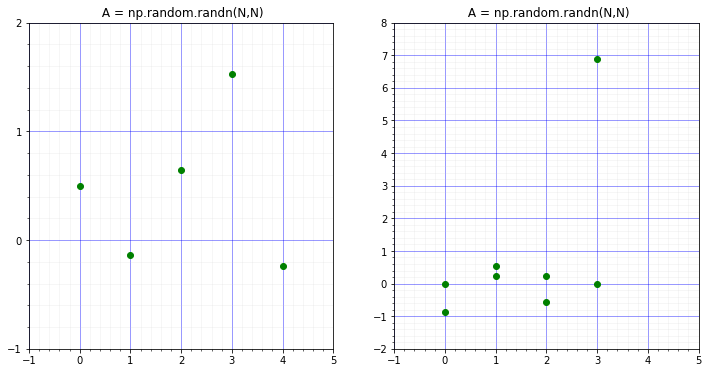

In [3]:
retval, roots = cv2.solvePoly(coeffs)



#######################################
print_image('roots','roots',roots,0,5,0,4,0,5)
print_image('roots','roots',roots[:,0,:],0,5,0,4,0,5)
print("retval =",retval)


plt.figure(figsize=(12,6))
plt.subplot(121)
plt_view_grid(plt, 'on',(-1,5,-1,2),(1,0.2,1,0.2),major_color='b')
plt.title(' A = np.random.randn(N,N)')
plt.plot(coeffs,'o', color="green")

plt.subplot(122)
plt_view_grid(plt, 'on',(-1,5,-2,8),(1,0.2,1,0.2),major_color='b')
plt.title(' A = np.random.randn(N,N)')
plt.plot(roots[:,0,:],'o', color="green")

plt.show()

In [4]:
for i in range(N):
    print('Root', roots[i],'residual:', 
          np.abs(np.polyval(coeffs[::-1], roots[i][0][0]+1j*roots[i][0][1])))

Root [[-8.59204140e-01 -1.62066555e-33]] residual: [5.55111512e-17]
Root [[0.23211591 0.55133557]] residual: [6.20633538e-17]
Root [[ 0.23211591 -0.55133557]] residual: [6.20633538e-17]
Root [[6.89938361e+00 4.02714390e-33]] residual: [2.99760217e-14]


[-0.85920414  0.23211591  0.23211591  6.89938361]
         3          2
-0.8592 x + 0.2321 x + 0.2321 x + 6.899


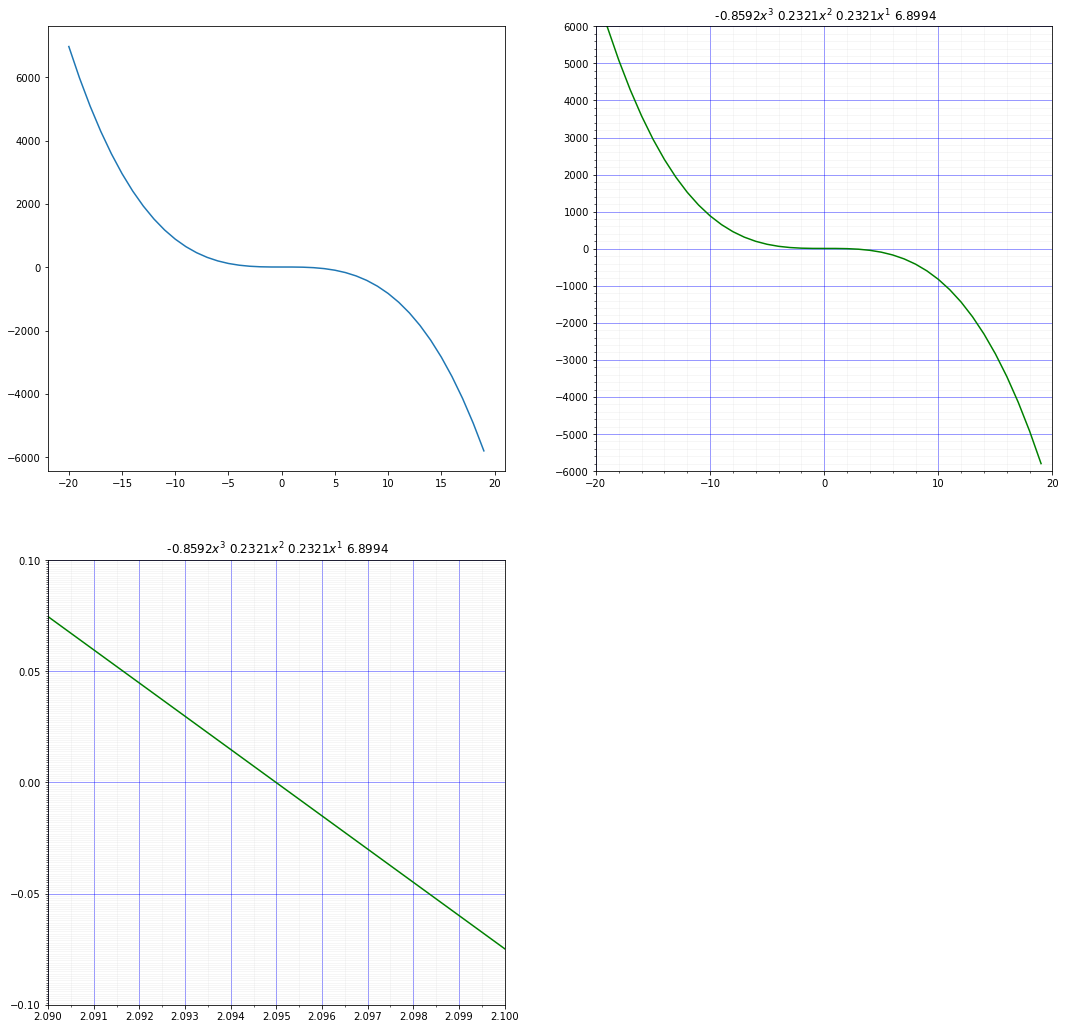

In [5]:
roots_real = roots[:,0][:,0] # r0 = roots[:,0]; r1 = r0[:,0]; [-0.85920414  0.23211591  0.23211591  6.89938361]
print(roots_real)
p = np.poly1d(roots_real)
print(np.poly1d(p))

x = np.arange(-20,20); y = p(x)

plt.figure(figsize=(18,18))

plt.subplot(221)
plt.plot(x, y)

plt.subplot(222)
plt_view_grid(plt, 'on',(-20,20,-6000,6000),(10,2,1000,200),major_color='b')
str_title =""
for ii in range(len(roots_real)-1):
    str_title += r' {0:.4f}$x^{1}$'.format(roots_real[ii],len(roots_real)-ii-1)
str_title += r' {0:.4f}'.format(roots_real[-1])
plt.title(str_title)
plt.plot(x,y, color="green")

plt.subplot(223)
plt_view_grid(plt, 'on',(2.09,2.1,-0.1,0.1),(0.001,0.0005,0.05,0.001),major_color='b')
plt.title(str_title)
plt.plot(x,y, color="green")

plt.show()

In [6]:
# https://stackoverflow.com/questions/28646336/pretty-printing-polynomials-in-ipython-notebook

import numpy as np
nppoly = np.polynomial.polynomial.Polynomial([1,2,3])
print(nppoly) #Polynomial([ 1.,  2.,  3.], [-1.,  1.], [-1.,  1.])

import sympy as sp
from sympy.abc import x
sp.init_printing()
print(sp.Poly(reversed(nppoly.coef),x).as_expr())
print(sp.Poly(reversed(roots_real),x).as_expr())

poly([1. 2. 3.])
3.0*x**2 + 2.0*x + 1.0
6.89938361445537*x**3 + 0.232115912788557*x**2 + 0.232115912788557*x - 0.859204140355245
